# Creating and training your own dataset from Google Images

*by: Giedrius Blazys. Inspired by Francisco Ingham, Jeremy Howard and [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

Here is a great resource to automate the downloading of google or bing images: [ai_utilities](https://github.com/prairie-guy/ai_utilities)

In [87]:
from fastai import *
from fastai.tabular import *
from fastai.vision import *

In [21]:
from image_download import *

In [22]:
!ls data/cola

coca_cola  nuka_cola  other  pepsi_cola


We start with a dataset of Coca Cola, Pepsi Cola, Nuka Cola and other images, which where downloaded using Google image search.

In [32]:
path = Path('data/cola')

In [31]:
classes = ['coca_cola', 'nuka_cola', 'other', 'pepsi_cola']
search_terms = ['coca cola', 'nuka cola', 'cola -coke -pepsi -coca', 'pepsi cola']

In [34]:
for i in range(4):
    image_download(search_text=search_terms[i], num_images=1000, label=classes[i], engine='all', image_dir=path)

2020-01-02 21:38:38,666 - INFO - icrawler.crawler - start crawling...
2020-01-02 21:38:38,667 - INFO - icrawler.crawler - starting 2 feeder threads...
2020-01-02 21:38:38,668 - INFO - feeder - thread feeder-001 exit
2020-01-02 21:38:38,670 - INFO - feeder - thread feeder-002 exit
2020-01-02 21:38:38,670 - INFO - icrawler.crawler - starting 2 parser threads...
2020-01-02 21:38:38,676 - INFO - icrawler.crawler - starting 8 downloader threads...
2020-01-02 21:38:39,439 - INFO - parser - parsing result page https://www.google.com/search?q=cola+-coke+-pepsi+-coca&ijn=0&start=0&tbs=&tbm=isch
2020-01-02 21:38:39,548 - INFO - downloader - image #1	https://apklausa.lt/system/forms/pics/000/160/112/original/pic.jpg?1484915593
2020-01-02 21:38:39,550 - INFO - downloader - image #2	https://uzsakymai.zaliagiria.lt/media/cache/thumbnail_270x1000/uploads/photos/8c43bbec0bc80b258af8f8e98b538a0f1eca3f2e.jpeg
2020-01-02 21:38:39,553 - INFO - downloader - image #3	https://www.barbora.lt/api/Images/GetInv

2020-01-02 21:38:40,662 - INFO - downloader - image #52	http://www.bennet.lt/cache/images/78a5c4a073b99e26ba402621cbc15933.jpg
2020-01-02 21:38:40,668 - INFO - downloader - image #53	http://lt.zooverresources.com/images/E71315L2B787321D0W300H245RT2/Cola-di-Lazise.jpg
2020-01-02 21:38:40,714 - INFO - downloader - image #54	https://www.assorti.lt/cache/images/042f974a3cf65baf2490cff4f6923078.png
2020-01-02 21:38:40,943 - INFO - downloader - image #55	http://www.yerbamate.lt/552-878-thickbox/azijin-centel-gotu-cola-100-g.jpg
2020-01-02 21:38:41,034 - INFO - downloader - image #56	https://a.allegroimg.com/original/03938d/5ee9a0f94155b8d79204806cd27a
2020-01-02 21:38:41,078 - INFO - downloader - image #57	https://www.barbora.lt/api/Images/GetInventoryImage?id=24497239-c43c-4b09-8f7b-1ccc84e9059c
2020-01-02 21:38:41,101 - INFO - downloader - image #58	https://cdn11.bigcommerce.com/s-5nw6gteii/images/stencil/1280x1280/products/114/378/mate_cola_33-600x600__06368.1558457638.png?c=2&imbypass=on

2020-01-02 21:38:42,614 - INFO - downloader - image #92	https://volfasengelman.lt/wp-content/uploads/2017/09/280x500_kanes_0.33_1.png
2020-01-02 21:38:42,621 - INFO - downloader - image #93	https://etari.de/media/images/org/Zughammer7-1000x1000_1_1.jpg
2020-01-02 21:38:42,622 - INFO - downloader - image #94	https://cdn.shopify.com/s/files/1/0150/0948/0758/products/Legion-240g-Jar-Focus-Cherry-Cola-Front-opt-900x900_900x.png?v=1568077953
2020-01-02 21:38:42,650 - INFO - downloader - image #95	https://voniosnamai.lt/3041-tm_large_default/roltechnik-cola-900900-mm-kvadratinis-duso-padeklas.jpg
2020-01-02 21:38:42,717 - INFO - downloader - image #96	http://www.europeanhitradio.lt/wp-content/uploads/2017/10/CamelPhat-Elderbrook-Cola-300x300.jpg
2020-01-02 21:38:42,856 - INFO - downloader - image #97	https://etari.de/media/images/org/cola-fria-kaltkleber.jpg
2020-01-02 21:38:42,872 - INFO - downloader - image #98	https://www.airsofos.lt/wp-content/uploads/2018/04/COLA-RAUDONA-AIRSOFA-PREMIUM

2020-01-02 21:38:44,186 - WARNING - urllib3.connection - Certificate did not match expected hostname: srv80.gelsva.lt. Certificate: {'subject': ((('commonName', 'balsuok.vynoteka.lt'),),), 'subjectAltName': [('DNS', 'balsuok.vynoteka.lt'), ('DNS', 'www.balsuok.vynoteka.lt')]}
2020-01-02 21:38:44,187 - ERROR - downloader - Exception caught when downloading file https://srv80.gelsva.lt/sites/default/files/styles/sc_3/public/images/2019-12/sel.png?h=a5cda9ae&itok=OqVFclRK, error: HTTPSConnectionPool(host='srv80.gelsva.lt', port=443): Max retries exceeded with url: /sites/default/files/styles/sc_3/public/images/2019-12/sel.png?h=a5cda9ae&itok=OqVFclRK (Caused by SSLError(SSLCertVerificationError("hostname 'srv80.gelsva.lt' doesn't match either of 'balsuok.vynoteka.lt', 'www.balsuok.vynoteka.lt'"))), remaining retry times: 1
2020-01-02 21:38:44,223 - WARNING - urllib3.connection - Certificate did not match expected hostname: srv80.gelsva.lt. Certificate: {'subject': ((('commonName', 'balsuo

2020-01-02 21:38:46,265 - INFO - downloader - image #188	http://m.lt.jmjhousewarefactory.com/uploads/201712865/stainless-steel-cola-can-shape-vacuum-bottle201712061039512931828.jpg
2020-01-02 21:38:46,279 - INFO - downloader - image #189	http://bennet.lt/images/galleries/1536239474_250ml-cc-can.jpg
2020-01-02 21:38:46,293 - INFO - downloader - image #190	https://payload.cargocollective.com/1/2/95588/13675452/craft_750.jpg
2020-01-02 21:38:46,542 - INFO - downloader - image #191	https://dqzrr9k4bjpzk.cloudfront.net/images/1417021/45909096.jpg
2020-01-02 21:38:46,571 - INFO - downloader - image #192	https://res.cloudinary.com/ratebeer/image/upload/w_152,h_309,c_pad,d_beer_img_default.png,f_auto/beer_283035
2020-01-02 21:38:46,598 - INFO - downloader - image #193	https://playpro.lt/image/cache/data/STALINIAI-KOMPIUTERIAI-KOMPONENTAI/NZXT/nzxt-h-series-h700-nuka-cola-limited-edition-matte-black-red-kompiuterio-korpusas-playpro-lt-01-600x600.png
2020-01-02 21:38:46,651 - INFO - downloader -

2020-01-02 21:38:47,816 - INFO - downloader - image #226	https://costless.lt/storage/crowd/products/15684830775d7d2705c8967.jpg
2020-01-02 21:38:47,860 - INFO - downloader - image #227	https://p0.piqsels.com/preview/403/317/283/mexico-santiago-cola-de-caballo-lake.jpg
2020-01-02 21:38:47,866 - INFO - downloader - image #228	https://aivashop.lt/image/cache/data/prek/arpl/duso-padeklas-cola-p-900x900-u3rol-8000023-4-AivaShop-500x500.jpg
2020-01-02 21:38:47,901 - INFO - downloader - image #229	https://www.assorti.lt/cache/images/a025ad6534acf70abe1606d7ce2f6f4a.png
2020-01-02 21:38:47,915 - INFO - downloader - image #230	http://lt.kmfilling.com/uploads/201711725/pet-bottled-co2-cola-energy-drink-filling-equi38193840987.jpg
2020-01-02 21:38:47,944 - INFO - downloader - image #231	http://lt.zooverresources.com/images/E71315L2B886266D0W900H675/Cola-di-Lazise.jpg
2020-01-02 21:38:47,955 - INFO - downloader - image #232	https://bembel-with-care.com/wp-content/uploads/2018/09/header-apfelwein-d

2020-01-02 21:38:50,001 - INFO - downloader - image #281	https://www.varle.lt/static/uploads/products/295/dif/difuzed-baseball-cap-fallout-drink-nuka-cola.jpg
2020-01-02 21:38:50,116 - INFO - downloader - image #282	http://m.lt.rulyplasticmanufacture.com/Content/upload/2018249003/201807171605006950109.jpg
2020-01-02 21:38:50,121 - INFO - downloader - image #283	https://www.196flavors.com/wp-content/uploads/2018/12/cola-de-mono-3.jpg
2020-01-02 21:38:50,131 - INFO - downloader - image #284	https://images.vinted.net/thumbs/f800/01c01_BJyCpERYif9bjFFgEcDwSpPb.jpeg?1512648417$84805d66c7b1f7587becb31d1cb1b08494c26a4f
2020-01-02 21:38:50,136 - INFO - downloader - image #285	https://ksd-images.lt/display/aikido/store/6d47632fcab2998a1a87d034f5465d49.jpg
2020-01-02 21:38:50,268 - INFO - downloader - image #286	https://cortesdecabelloparacararedonda.info/wp-content/uploads/2019/06/Peinado-cola-de-caballo-con-Fleco-300x300.jpeg
2020-01-02 21:38:50,312 - INFO - downloader - image #287	https://man

2020-01-02 21:38:52,387 - INFO - downloader - image #327	https://sc02.alicdn.com/kf/HTB1_a4rQVXXXXa5XVXXq6xXFXXX1/350ml-art-customed-cola-beer-shaped-tin.jpg_350x350.jpg
2020-01-02 21:38:52,393 - INFO - downloader - image #328	https://mainstreetartisans.com/upload/iskusstvo-i-razvlecheniya/104/pevec-kola-beldi-biografiya-nacionalnost-roditeli-semya.jpg
2020-01-02 21:38:52,473 - INFO - parser - parsing result page https://www.google.com/search?q=cola+-coke+-pepsi+-coca&ijn=4&start=400&tbs=&tbm=isch
2020-01-02 21:38:52,728 - INFO - downloader - image #329	https://s-ec.bstatic.com/xdata/images/hotel/max500/142297124.jpg?k=768b3dec732903e208d4241b701b1c237be34c5905c891e9d4f14fad1c0f7659&o=
2020-01-02 21:38:52,774 - INFO - downloader - image #330	https://cdn.shopify.com/s/files/1/0039/5001/8629/products/100ml-cherry-blue-cola-vape_ejuice_wholesale_1024x.png?v=1566875970
2020-01-02 21:38:52,833 - INFO - downloader - image #331	https://i.colnect.net/f/3523/018/AB-Cola.jpg
2020-01-02 21:38:52,

2020-01-02 21:38:55,935 - INFO - downloader - image #380	http://cdn.shopify.com/s/files/1/1648/6165/products/kola-pocket_grande.jpg?v=1481903469
2020-01-02 21:38:55,955 - WARNING - urllib3.connection - Certificate did not match expected hostname: srv80.gelsva.lt. Certificate: {'subject': ((('commonName', 'balsuok.vynoteka.lt'),),), 'subjectAltName': [('DNS', 'balsuok.vynoteka.lt'), ('DNS', 'www.balsuok.vynoteka.lt')]}
2020-01-02 21:38:55,956 - ERROR - downloader - Exception caught when downloading file https://srv80.gelsva.lt/sites/default/files/images/2019-08/logo-bottom.svg, error: HTTPSConnectionPool(host='srv80.gelsva.lt', port=443): Max retries exceeded with url: /sites/default/files/images/2019-08/logo-bottom.svg (Caused by SSLError(SSLCertVerificationError("hostname 'srv80.gelsva.lt' doesn't match either of 'balsuok.vynoteka.lt', 'www.balsuok.vynoteka.lt'"))), remaining retry times: 2
2020-01-02 21:38:55,991 - WARNING - urllib3.connection - Certificate did not match expected hos

2020-01-02 21:38:58,836 - INFO - downloader - image #413	http://eli.mama.lt/uploads/3o.JPG
2020-01-02 21:38:58,837 - INFO - downloader - image #414	https://payload.cargocollective.com/1/2/95588/3984100/India_1600.jpg
2020-01-02 21:38:58,880 - INFO - downloader - image #415	https://i.pinimg.com/originals/38/08/a0/3808a0437b97ca57e51772b070127541.jpg
2020-01-02 21:38:58,945 - INFO - downloader - image #416	http://www.build-destroy.com/content/1.projects/17.jollycola/@2x/07-builddestroy-morten-elgaard-pedersen-vestfyn-bryggeri-skolen-for-visul-kommunikation-jolly-cola-tshirt.jpg
2020-01-02 21:38:58,954 - INFO - downloader - image #417	http://www.europeanwaterfalls.com/wp-content/uploads/Cola-de-caballo-cascada-2.jpg
2020-01-02 21:38:59,085 - INFO - parser - no more page urls for thread parser-002 to parse
2020-01-02 21:38:59,086 - INFO - parser - thread parser-002 exit
2020-01-02 21:38:59,159 - INFO - downloader - image #418	https://i1.wp.com/www.dominicanabroad.com/wp-content/uploads/201

2020-01-02 21:39:12,717 - INFO - icrawler.crawler - Crawling task done!
2020-01-02 21:39:12,733 - INFO - icrawler.crawler - start crawling...
2020-01-02 21:39:12,734 - INFO - icrawler.crawler - starting 2 feeder threads...
2020-01-02 21:39:12,736 - INFO - icrawler.crawler - starting 2 parser threads...
2020-01-02 21:39:12,739 - INFO - icrawler.crawler - starting 8 downloader threads...
2020-01-02 21:39:13,091 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cola -coke -pepsi -coca&first=20
2020-01-02 21:39:13,104 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cola -coke -pepsi -coca&first=0
2020-01-02 21:39:13,269 - INFO - downloader - image #1	https://www.welt.de/img/wirtschaft/mobile161802970/0492501887-ci102l-w1024/Ali-Cola-2.jpg
2020-01-02 21:39:13,397 - INFO - downloader - image #2	http://partyretter.at/_pics/14/_1214x905_1_0_0_-336x0_ffffff/Bacardi_Cola.jpg
2020-01-02 21:39:13,455 - INFO - downloader - image #3	https://www.world

2020-01-02 21:39:19,289 - INFO - downloader - image #50	https://nomageddon.com/wp-content/uploads/2015/11/Nuka-Cola-Quantum.jpg
2020-01-02 21:39:19,299 - INFO - downloader - image #51	https://pianosgradimi.mx/wp-content/uploads/2017/11/DSC07084.jpg
2020-01-02 21:39:19,398 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cola -coke -pepsi -coca&first=80
2020-01-02 21:39:19,697 - INFO - downloader - image #52	http://3.bp.blogspot.com/-b_ALMAyp8zE/U9O6FszjD1I/AAAAAAAAAU0/QPuPVwKFyMc/s1600/20140529_134010.jpg
2020-01-02 21:39:19,788 - INFO - downloader - image #53	https://i.ytimg.com/vi/HCGAlgRn6LY/maxresdefault.jpg
2020-01-02 21:39:19,846 - INFO - downloader - image #54	https://www.fabricaflamenca.com/386-thickbox_default/falda-de-cola-a-medida-tela-crespon.jpg
2020-01-02 21:39:19,995 - INFO - downloader - image #55	http://misremedios.com/wp-content/uploads/2014/03/cola-de-caballo-g.jpg
2020-01-02 21:39:20,060 - INFO - downloader - image #56	https://i.ytimg.com/vi

2020-01-02 21:39:22,862 - INFO - downloader - image #104	http://www.elbauldelaabuelita.com/img/p/214-656-thickbox.jpg
2020-01-02 21:39:22,939 - INFO - downloader - image #105	https://cdn.shopify.com/s/files/1/0003/4750/4676/products/Nuka-Cola-Falloutt_1024x1024.jpg
2020-01-02 21:39:23,085 - INFO - downloader - image #106	https://image.invaluable.com/housePhotos/millersauction/47/661047/H5779-L195644041.jpg
2020-01-02 21:39:23,126 - INFO - downloader - image #107	https://image.invaluable.com/housePhotos/millersauction/47/661047/H5779-L195644024.jpg
2020-01-02 21:39:23,171 - INFO - downloader - image #108	https://image.invaluable.com/housePhotos/millersauction/47/661047/H5779-L195644031.jpg
2020-01-02 21:39:23,217 - INFO - downloader - image #109	https://image.invaluable.com/housePhotos/millersauction/47/661047/H5779-L195644003.jpg
2020-01-02 21:39:23,248 - INFO - downloader - image #110	https://static.wixstatic.com/media/c36f67_bb76929d87e6444dbf73c0759f7b296b.jpg
2020-01-02 21:39:23,25

2020-01-02 21:39:27,137 - INFO - downloader - image #153	http://www.monkeymods.com/wp-content/uploads/2016/01/nuka-cola-decorations-for-fo4-2.jpg
2020-01-02 21:39:27,144 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cola -coke -pepsi -coca&first=260
2020-01-02 21:39:27,204 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cola -coke -pepsi -coca&first=280
2020-01-02 21:39:27,263 - INFO - downloader - image #154	https://www.wikihow.com/images/0/04/Clean-Glue-from-Windows-Step-16.jpg
2020-01-02 21:39:27,289 - INFO - downloader - image #155	http://www.monkeymods.com/wp-content/uploads/2016/01/nuka-cola-fusion-core-retexture-for-fo4-1.jpg
2020-01-02 21:39:27,320 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cola -coke -pepsi -coca&first=300
2020-01-02 21:39:27,375 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cola -coke -pepsi -coca&first=320
2020-01-02 21:39:27,505 - INFO - download

2020-01-02 21:39:35,177 - INFO - downloader - thread downloader-006 exit
2020-01-02 21:39:37,572 - INFO - downloader - no more download task for thread downloader-008
2020-01-02 21:39:37,572 - INFO - downloader - thread downloader-008 exit
2020-01-02 21:39:37,772 - INFO - icrawler.crawler - Crawling task done!



**********************************************************
Path:       /home/giedrbl47/data_disk/pers_proj/cola-image-classifier/data/cola/other
Removed:    0 duplicate images
Removed:    76 non-jpeg images 
Downloaded: 540 images
**********************************************************


Then we can remove any images that can't be opened:

In [35]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

coca_cola


nuka_cola


other


pepsi_cola


In [36]:
bs = 64
size = 128
size_big = 299

In [37]:
get_y_fn = lambda o: o.parent.name

In [60]:
np.random.seed(41)

src = (ImageList.from_folder(path)
       .split_by_rand_pct()
       .label_from_folder()
      )
        
data = (src.transform(get_transforms(do_flip=False),size=size)
       .databunch()
       .normalize(imagenet_stats))

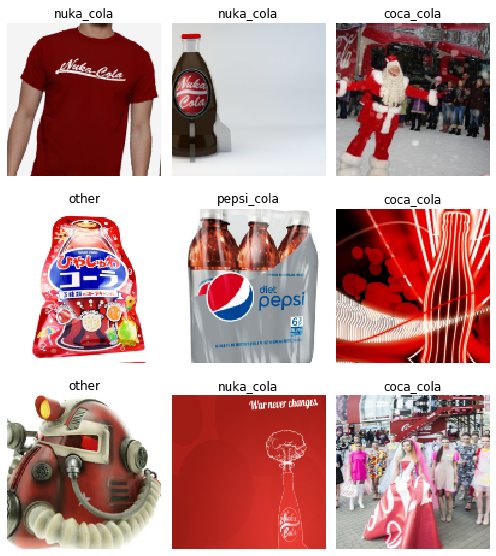

In [61]:
data.show_batch(rows=3, figsize=(7,8))

In [41]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['coca_cola', 'nuka_cola', 'other', 'pepsi_cola'], 4, 1697, 424)

## Train model

In [43]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate) 

In [44]:
learn.freeze()

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


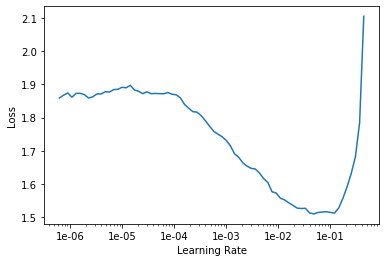

In [46]:
learn.recorder.plot()

In [47]:
lr = 0.01

In [48]:
learn.fit_one_cycle(6, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.462472,1.285725,0.403302,00:14
1,1.169305,0.875503,0.323113,00:13
2,0.997964,0.865242,0.330189,00:13
3,0.862139,0.839857,0.339623,00:13
4,0.729423,0.825051,0.304245,00:12
5,0.636375,0.800316,0.299528,00:13


In [49]:
learn.save('stage-1_128')

In [50]:
learn.load('stage-1_128')
print('loaded stage-1_128 model')

loaded stage-1_128 model


In [51]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


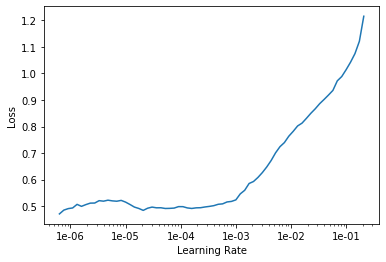

In [52]:
learn.lr_find()
learn.recorder.plot()

In [53]:
learn.fit_one_cycle(8, max_lr=slice(1e-4,lr/2))

epoch,train_loss,valid_loss,error_rate,time
0,0.575228,0.844987,0.301887,00:13
1,0.610775,6.737029,0.514151,00:13
2,0.646707,0.936881,0.313679,00:13
3,0.574380,0.776016,0.273585,00:13
4,0.468907,0.871261,0.261792,00:13
5,0.366520,0.725148,0.240566,00:14
6,0.265216,0.693132,0.214623,00:13
7,0.197596,0.679009,0.202830,00:13


In [54]:
learn.save('stage-2_128')

## Interpretation

In [67]:
learn.load('stage-2_128')
print('loaded stage-2_128 model')

loaded stage-2_128 model


In [56]:
interp = ClassificationInterpretation.from_learner(learn)

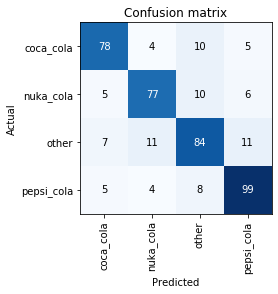

In [57]:
interp.plot_confusion_matrix()

## Increase image size

Retrain the model with larger images

In [68]:
data = (src
        .transform(get_transforms(), size=size_big)
        .databunch(bs=bs//2)
        .normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 299, 299])

In [69]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


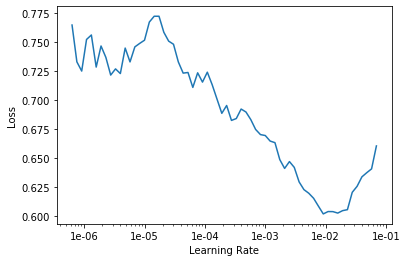

In [64]:
learn.lr_find()
learn.recorder.plot()

In [70]:
lr=2e-4

In [71]:
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.689869,0.765298,0.235849,00:20
1,0.646790,0.719265,0.224057,00:20
2,0.588222,0.691126,0.221698,00:20


In [72]:
learn.save('stage-1-299-rn50')

In [73]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


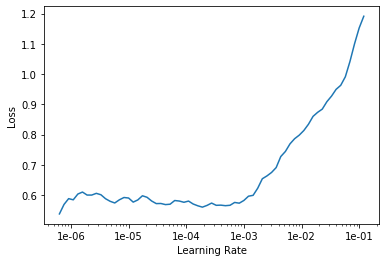

In [74]:
learn.lr_find()
learn.recorder.plot()

In [75]:
learn.fit_one_cycle(6, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.601478,0.687903,0.216981,00:24
1,0.561170,0.612666,0.195755,00:24
2,0.522291,0.584103,0.200472,00:24
3,0.444925,0.574528,0.186321,00:26
4,0.423147,0.587889,0.188679,00:26
5,0.399799,0.583902,0.188679,00:26


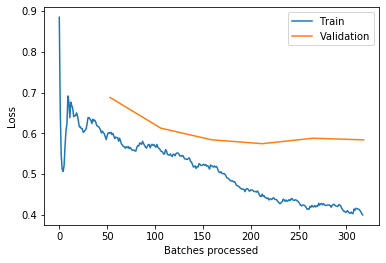

In [76]:
learn.recorder.plot_losses()

In [77]:
learn.save('stage-2-299-rn50')

In [78]:
interp = ClassificationInterpretation.from_learner(learn)

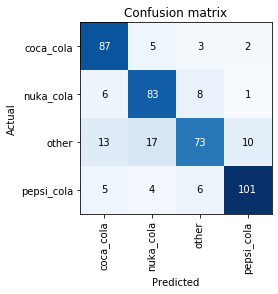

In [79]:
interp.plot_confusion_matrix()

In [91]:
# interp.plot_top_losses(9)
# interp._cl_int_top_plot_losses(k=9)
interp.most_confused(16)

[('other', 'nuka_cola', 17)]

In [96]:
# interp.plot_multi_top_losses(9)